# Stock Prediction ML Model

In [3]:
# Install the required libraries
# !pip install yfinance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import yfinance as yf

# Define the start and end dates
start = '2010-01-01'
end = '2019-12-31'

# Fetch stock data for AAPL and YHOO using yfinance
ticker = 'AAPL'  # List of tickers
df = yf.download(ticker, start=start, end=end)

# Select specific columns to match the screenshot
df = df[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']]

# Display the first few rows
print(df.head())



[*********************100%***********************]  1 of 1 completed

Price                          High       Low      Open     Close     Volume  \
Ticker                         AAPL      AAPL      AAPL      AAPL       AAPL   
Date                                                                           
2010-01-04 00:00:00+00:00  7.660714  7.585000  7.622500  7.643214  493729600   
2010-01-05 00:00:00+00:00  7.699643  7.616071  7.664286  7.656429  601904800   
2010-01-06 00:00:00+00:00  7.686786  7.526786  7.656429  7.534643  552160000   
2010-01-07 00:00:00+00:00  7.571429  7.466071  7.562500  7.520714  477131200   
2010-01-08 00:00:00+00:00  7.571429  7.466429  7.510714  7.570714  447610800   

Price                     Adj Close  
Ticker                         AAPL  
Date                                 
2010-01-04 00:00:00+00:00  6.454505  
2010-01-05 00:00:00+00:00  6.465663  
2010-01-06 00:00:00+00:00  6.362819  
2010-01-07 00:00:00+00:00  6.351058  
2010-01-08 00:00:00+00:00  6.393281  


In [13]:
print(df.tail())

Price                           High        Low       Open      Close  \
Ticker                          AAPL       AAPL       AAPL       AAPL   
Date                                                                    
2019-12-23 00:00:00+00:00  71.062500  70.092499  70.132500  71.000000   
2019-12-24 00:00:00+00:00  71.222504  70.730003  71.172501  71.067497   
2019-12-26 00:00:00+00:00  72.495003  71.175003  71.205002  72.477501   
2019-12-27 00:00:00+00:00  73.492500  72.029999  72.779999  72.449997   
2019-12-30 00:00:00+00:00  73.172501  71.305000  72.364998  72.879997   

Price                         Volume  Adj Close  
Ticker                          AAPL       AAPL  
Date                                             
2019-12-23 00:00:00+00:00   98572000  68.908997  
2019-12-24 00:00:00+00:00   48478800  68.974510  
2019-12-26 00:00:00+00:00   93121200  70.342972  
2019-12-27 00:00:00+00:00  146266000  70.316277  
2019-12-30 00:00:00+00:00  144114400  70.733620  


In [4]:
df = df.reset_index()
print(df.head())

Price                       Date      High       Low      Open     Close  \
Ticker                                AAPL      AAPL      AAPL      AAPL   
0      2010-01-04 00:00:00+00:00  7.660714  7.585000  7.622500  7.643214   
1      2010-01-05 00:00:00+00:00  7.699643  7.616071  7.664286  7.656429   
2      2010-01-06 00:00:00+00:00  7.686786  7.526786  7.656429  7.534643   
3      2010-01-07 00:00:00+00:00  7.571429  7.466071  7.562500  7.520714   
4      2010-01-08 00:00:00+00:00  7.571429  7.466429  7.510714  7.570714   

Price      Volume Adj Close  
Ticker       AAPL      AAPL  
0       493729600  6.454505  
1       601904800  6.465663  
2       552160000  6.362819  
3       477131200  6.351058  
4       447610800  6.393281  


In [5]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_1608\4261181942.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis=1)


Price,High,Low,Open,Close,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,7.660714,7.585000,7.622500,7.643214,493729600
1,7.699643,7.616071,7.664286,7.656429,601904800
2,7.686786,7.526786,7.656429,7.534643,552160000
3,7.571429,7.466071,7.562500,7.520714,477131200
4,7.571429,7.466429,7.510714,7.570714,447610800


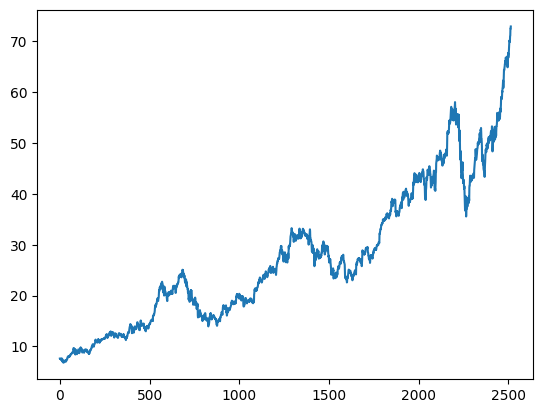

In [6]:
plt.plot(df['Close'])
plt.show()

In [29]:
df

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600
1,7.699643,7.616071,7.664286,7.656429,601904800
2,7.686786,7.526786,7.656429,7.534643,552160000
3,7.571429,7.466071,7.562500,7.520714,477131200
4,7.571429,7.466429,7.510714,7.570714,447610800
...,...,...,...,...,...
2510,71.062500,70.092499,70.132500,71.000000,98572000
2511,71.222504,70.730003,71.172501,71.067497,48478800
2512,72.495003,71.175003,71.205002,72.477501,93121200
2513,73.492500,72.029999,72.779999,72.449997,146266000


In [7]:
ma100 = df['Close'].rolling(100).mean()
print(ma100)

Ticker       AAPL
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
...           ...
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325

[2515 rows x 1 columns]


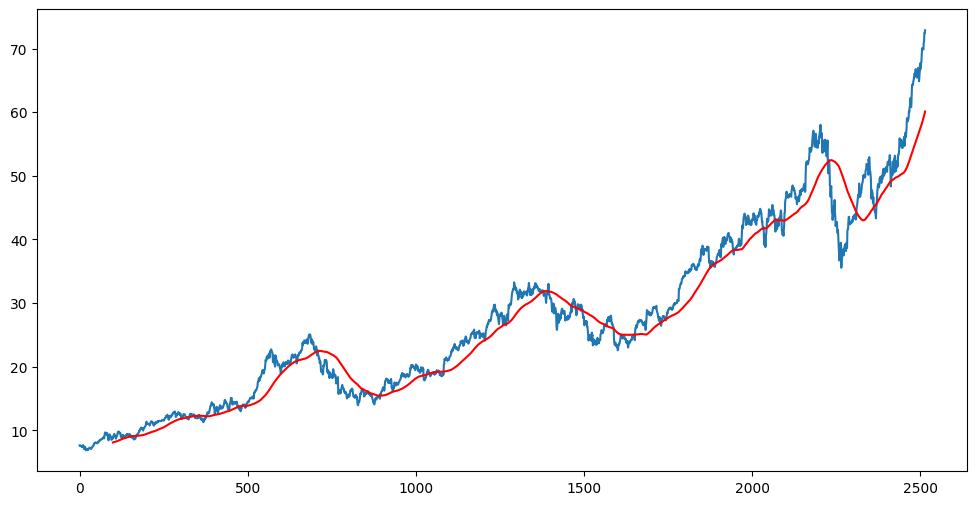

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'red')

In [9]:
ma200 = df['Close'].rolling(200).mean()
print(ma200)

Ticker       AAPL
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
...           ...
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100

[2515 rows x 1 columns]


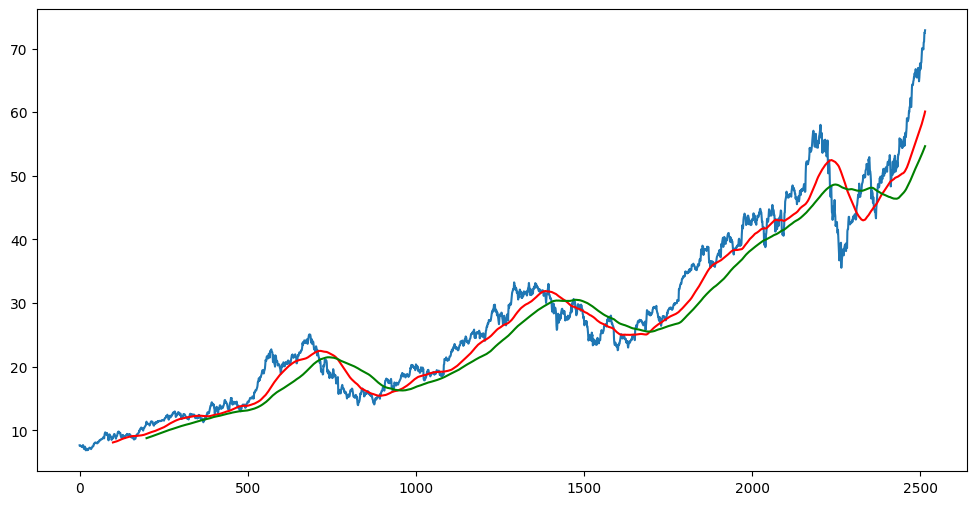

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [41]:
df.shape

(2393, 6)

In [44]:
df.shape

(2515, 6)

In [47]:
df.shape

(2515, 5)

In [11]:
#Splitting data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [12]:
data_training.head()

Ticker,AAPL
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [13]:
data_testing.head()

Ticker,AAPL
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [15]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
#ML Model

In [16]:
# Import necessary libraries from Keras
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

# Define the Sequential model
model = Sequential()

# Add LSTM layers with Dropout
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

# Add Dense layer
model.add(Dense(units=1))

# Print model summary
# model.summary()


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 35s 574ms/step - loss: 0.0769
Epoch 2/50
52/52 [==============================] - 30s 580ms/step - loss: 0.0115
Epoch 3/50
52/52 [==============================] - 29s 565ms/step - loss: 0.0105
Epoch 4/50
52/52 [==============================] - 30s 577ms/step - loss: 0.0100
Epoch 5/50
52/52 [==============================] - 30s 568ms/step - loss: 0.0091
Epoch 6/50
52/52 [==============================] - 27s 520ms/step - loss: 0.0102
Epoch 7/50
52/52 [==============================] - 26s 505ms/step - loss: 0.0088
Epoch 8/50
52/52 [==============================] - 26s 497ms/step - loss: 0.0072
Epoch 9/50
52/52 [==============================] - 27s 519ms/step - loss: 0.0072
Epoch 10/50
52/52 [==============================] - 31s 597ms/step - loss: 0.0068
Epoch 11/50
52/52 [==============================] - 30s 579ms/step - loss: 0.0070
Epoch 12/50
52/52 [==============================] - 33s 626ms/step - loss: 0.0072
Epoch 13/50
5

In [22]:
model.save('keras_model.h5')

In [25]:
data_testing.head()


Ticker,AAPL
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [26]:
data_training.tail(100)

Ticker,AAPL
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [27]:
past_100_days = data_training.tail(100)

In [31]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [32]:
final_df.head()

Ticker,AAPL
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [33]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [35]:
input_data.shape

(855, 1)

In [36]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [37]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [38]:
#Making Predictions

y_predicted = model.predict(x_test)

24/24 [==============================] - 2s 74ms/step


In [39]:
y_predicted.shape

(755, 1)

In [40]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [41]:
y_predicted

array([[0.11764933],
       [0.11836714],
       [0.11910416],
       [0.11982569],
       [0.120519  ],
       [0.12114157],
       [0.12168823],
       [0.12216099],
       [0.12256041],
       [0.12291309],
       [0.12324214],
       [0.1235746 ],
       [0.12390859],
       [0.12426908],
       [0.12465636],
       [0.12508409],
       [0.12554546],
       [0.12604322],
       [0.12655596],
       [0.12710038],
       [0.12767963],
       [0.12829296],
       [0.12893902],
       [0.12961309],
       [0.13037215],
       [0.1312649 ],
       [0.13235214],
       [0.13368219],
       [0.13529748],
       [0.13723928],
       [0.13951676],
       [0.14211956],
       [0.14503959],
       [0.148258  ],
       [0.15175284],
       [0.15547512],
       [0.15938915],
       [0.16344702],
       [0.16760226],
       [0.17175756],
       [0.17584431],
       [0.17980988],
       [0.18363388],
       [0.18726955],
       [0.19074416],
       [0.194038  ],
       [0.19715121],
       [0.200

In [42]:
scaler.scale_

array([0.02123255])

In [43]:
scale_factor = 1/0.02123255
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

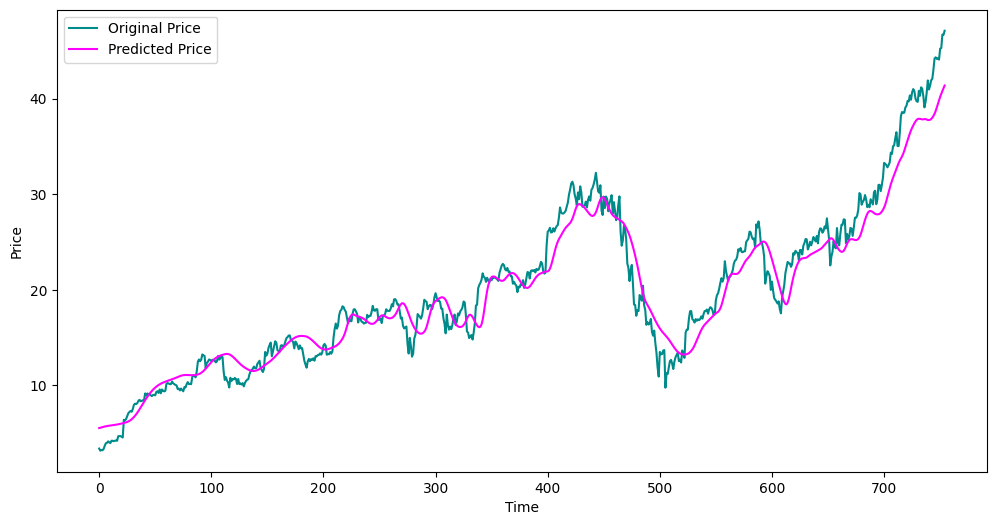

In [56]:
plt.figure(figsize=(12,6))
plt.plot(y_test, color='darkcyan', label='Original Price')
plt.plot(y_predicted, color='magenta', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
model.save('keras_model.h5')
